<a href="https://colab.research.google.com/github/Alfahad12/Index_Prediction/blob/main/Index_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn import linear_model


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/M.Sc proj/data CPI - .csv')
df.head(10)

Sno       Sector  Year Month  Cereals and products  Meat and fish    Egg  \
0    1        Rural  2013   Jan                 107.5          106.3  108.1   
1    2        Urban  2013   Jan                 110.5          109.1  113.0   
2    3  Rural+Urban  2013   Jan                 108.4          107.3  110.0   
3    4        Rural  2013   Feb                 109.2          108.7  110.2   
4    5        Urban  2013   Mar                 112.9          112.9  116.9   
5    6  Rural+Urban  2013   Apr                 110.4          110.2  112.8   
6    7        Rural  2013   May                 110.2          108.8  109.9   
7    8        Urban  2013   Jun                 113.9          111.4  113.2   
8    9  Rural+Urban  2013   Jul                 111.4          109.7  111.2   
9   10        Rural  2013   Aug                 110.2          109.5  106.9   

   Milk and products  Oils and fats  Fruits  ...  Housing  Fuel and light  \
0              104.9          106.1   103.9  ...      NaN           105.5   
1              103.6          103.4   102.3  ...    100.3           105.4   
2              104.4          105.1   103.2  ...    100.3           105.5   
3              105.4          106.7   104.0  ...      NaN           106.2   
4              104.0          103.5   103.1  ...    100.4           105.7   
5              104.9          105.5   103.6  ...    100.4           106.0   
6              105.6          106.2   105.7  ...      NaN           106.1   
7              104.3          102.7   104.9  ...    100.4           106.0   
8              105.1          104.9   105.3  ...    100.4           106.1   
9              106.3          105.7   108.3  ...      NaN           106.5   

   Household goods and services  Health  Transport and communication  \
0                         104.8   104.0                        103.3   
1                         104.8   104.1                        103.2   
2                         104.8   104.0                        103.2   
3                         105.2   104.4                        103.9   
4                         105.2   104.7                        104.4   
5                         105.2   104.5                        104.2   
6                         105.6   104.7                        104.6   
7                         105.7   105.2                        105.5   
8                         105.6   104.9                        105.1   
9                         106.1   105.1                        104.4   

   Recreation and amusement  Education  Personal care and effects  \
0                     103.4      103.8                      104.7   
1                     102.9      103.5                      104.3   
2                     103.1      103.6                      104.5   
3                     104.0      104.1                      104.6   
4                     103.3      103.7                      104.3   
5                     103.6      103.9                      104.5   
6                     104.0      104.3                      104.3   
7                     103.5      103.8                      104.2   
8                     103.7      104.0                      104.3   
9                     104.5      104.8                      102.7   

   Miscellaneous  General index  
0          104.0          105.1  
1          103.7          104.0  
2          103.9          104.6  
3          104.4          105.8  
4          104.3          104.7  
5          104.4          105.3  
6          104.6          106.0  
7          104.9          105.0  
8          104.7          105.5  
9          104.6          106.4  

[10 rows x 31 columns]

In [ ]:
df.isnull().head(5)

Sno  Sector   Year  Month  Cereals and products  Meat and fish    Egg  \
0  False   False  False  False                 False          False  False   
1  False   False  False  False                 False          False  False   
2  False   False  False  False                 False          False  False   
3  False   False  False  False                 False          False  False   
4  False   False  False  False                 False          False  False   

   Milk and products  Oils and fats  Fruits  ...  Housing  Fuel and light  \
0              False          False   False  ...     True           False   
1              False          False   False  ...    False           False   
2              False          False   False  ...    False           False   
3              False          False   False  ...     True           False   
4              False          False   False  ...    False           False   

   Household goods and services  Health  Transport and communication  \
0                         False   False                        False   
1                         False   False                        False   
2                         False   False                        False   
3                         False   False                        False   
4                         False   False                        False   

   Recreation and amusement  Education  Personal care and effects  \
0                     False      False                      False   
1                     False      False                      False   
2                     False      False                      False   
3                     False      False                      False   
4                     False      False                      False   

   Miscellaneous  General index  
0          False          False  
1          False          False  
2          False          False  
3          False          False  
4          False          False  

[5 rows x 31 columns]

In [ ]:
df.describe()

Sno         Year  Cereals and products  Meat and fish  \
count  267.000000   267.000000            264.000000     261.000000   
mean   134.000000  2016.235955            129.451894     137.291954   
std     77.220464     2.171357              9.397156      16.341659   
min      1.000000  2013.000000            107.500000     106.300000   
25%     67.500000  2014.000000            123.175000     124.100000   
50%    134.000000  2016.000000            129.300000     138.200000   
75%    200.500000  2018.000000            136.825000     146.400000   
max    267.000000  2020.000000            152.700000     197.000000   

              Egg  Milk and products  Oils and fats      Fruits  Vegetables  \
count  264.000000         264.000000     264.000000  264.000000  264.000000   
mean   128.465909         131.440909     115.082955  133.040152  146.746591   
std     11.791228          12.852870       8.090729   13.216135   23.228327   
min    102.700000         103.600000     101.100000  102.300000  101.400000   
25%    118.900000         123.800000     107.900000  126.025000  129.625000   
50%    128.600000         133.300000     115.400000  135.100000  145.450000   
75%    137.500000         141.725000     121.100000  142.825000  160.475000   
max    157.000000         155.600000     138.200000  157.500000  231.500000   

       Pulses and products  ...     Housing  Fuel and light  \
count           264.000000  ...  176.000000      264.000000   
mean            132.459091  ...  129.145455      125.242424   
std              22.407642  ...   15.862411       12.808767   
min             103.500000  ...  100.300000      105.400000   
25%             114.875000  ...  116.650000      114.550000   
50%             127.200000  ...  127.600000      123.500000   
75%             142.725000  ...  143.300000      136.425000   
max             191.600000  ...  155.600000      153.400000   

       Household goods and services      Health  Transport and communication  \
count                    261.000000  264.000000                   261.000000   
mean                     127.088123  126.134848                   116.247510   
std                       12.788179   14.320808                     7.686039   
min                      104.800000  104.000000                   103.200000   
25%                      116.700000  114.075000                   110.900000   
50%                      126.500000  123.950000                   114.100000   
75%                      137.300000  136.325000                   121.000000   
max                      151.800000  158.200000                   141.400000   

       Recreation and amusement   Education  Personal care and effects  \
count                261.000000  261.000000                 261.000000   
mean                 123.365517  130.973563                 120.500383   
std                   12.302800   15.849694                  11.851175   
min                  102.900000  103.500000                 102.100000   
25%                  113.300000  118.700000                 109.700000   
50%                  122.400000  131.600000                 120.900000   
75%                  132.300000  143.700000                 129.300000   
max                  153.200000  161.900000                 152.200000   

       Miscellaneous  General index  
count     261.000000     261.000000  
mean      123.049425     128.773563  
std        11.682619      12.162719  
min       103.700000     104.000000  
25%       113.700000     119.500000  
50%       121.900000     129.000000  
75%       132.100000     138.500000  
max       151.700000     152.700000  

[8 rows x 29 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Sno                                  267 non-null    int64  
 1   Sector                               267 non-null    object 
 2   Year                                 267 non-null    int64  
 3   Month                                267 non-null    object 
 4   Cereals and products                 264 non-null    float64
 5   Meat and fish                        261 non-null    float64
 6   Egg                                  264 non-null    float64
 7   Milk and products                    264 non-null    float64
 8   Oils and fats                        264 non-null    float64
 9   Fruits                               264 non-null    float64
 10  Vegetables                           264 non-null    float64
 11  Pulses and products             

In [ ]:
df.shape

(267, 31)

In [ ]:
df.isnull().sum()

Sno                                     0
Sector                                  0
Year                                    0
Month                                   0
Cereals and products                    3
Meat and fish                           6
Egg                                     3
Milk and products                       3
Oils and fats                           3
Fruits                                  3
Vegetables                              3
Pulses and products                     3
Sugar and Confectionery                 3
Spices                                  3
Non-alcoholic beverages                 3
Prepared meals, snacks, sweets etc.     6
Food and beverages                      3
Pan, tobacco and intoxicants            6
Clothing                                6
Footwear                                6
Clothing and footwear                   6
Housing                                91
Fuel and light                          3
Household goods and services      

In [ ]:
df_withoutHousing=df.drop(['Housing'],axis=1)
df_withoutHousing
df_without_housing=df_withoutHousing.dropna()
df_without_housing.head(6)

Sno       Sector  Year Month  Cereals and products  Meat and fish    Egg  \
0    1        Rural  2013   Jan                 107.5          106.3  108.1   
1    2        Urban  2013   Jan                 110.5          109.1  113.0   
2    3  Rural+Urban  2013   Jan                 108.4          107.3  110.0   
3    4        Rural  2013   Feb                 109.2          108.7  110.2   
4    5        Urban  2013   Mar                 112.9          112.9  116.9   
5    6  Rural+Urban  2013   Apr                 110.4          110.2  112.8   

   Milk and products  Oils and fats  Fruits  ...  Clothing and footwear  \
0              104.9          106.1   103.9  ...                  106.4   
1              103.6          103.4   102.3  ...                  105.8   
2              104.4          105.1   103.2  ...                  106.2   
3              105.4          106.7   104.0  ...                  107.0   
4              104.0          103.5   103.1  ...                  106.4   
5              104.9          105.5   103.6  ...                  106.8   

   Fuel and light  Household goods and services  Health  \
0           105.5                         104.8   104.0   
1           105.4                         104.8   104.1   
2           105.5                         104.8   104.0   
3           106.2                         105.2   104.4   
4           105.7                         105.2   104.7   
5           106.0                         105.2   104.5   

   Transport and communication  Recreation and amusement  Education  \
0                        103.3                     103.4      103.8   
1                        103.2                     102.9      103.5   
2                        103.2                     103.1      103.6   
3                        103.9                     104.0      104.1   
4                        104.4                     103.3      103.7   
5                        104.2                     103.6      103.9   

   Personal care and effects  Miscellaneous  General index  
0                      104.7          104.0          105.1  
1                      104.3          103.7          104.0  
2                      104.5          103.9          104.6  
3                      104.6          104.4          105.8  
4                      104.3          104.3          104.7  
5                      104.5          104.4          105.3  

[6 rows x 30 columns]

In [ ]:
df_g1=df_without_housing.groupby(['Sector'])['Cereals and products','Meat and fish',	'Egg',
'Milk and products'	,'Oils and fats',	'Fruits','Vegetables','Pulses and products','Sugar and Confectionery',	
'Spices','Non-alcoholic beverages','Prepared meals, snacks, sweets etc.','Food and beverages','Pan, tobacco and intoxicants',
'Clothing and footwear','Fuel and light',	'Household goods and services','Health'	
,'Transport and communication','Recreation and amusement'	,'Education','Personal care and effects',	'Miscellaneous'	,'General index'].median()
df_g1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Cereals and products  Meat and fish    Egg  Milk and products  \
Sector                                                                       
Rural                       130.1          137.6  127.7              135.3   
Rural+Urban                 129.3          138.0  128.6              134.1   
Urban                       127.6          138.9  129.3              132.2   

             Oils and fats  Fruits  Vegetables  Pulses and products  \
Sector                                                                
Rural                119.9   136.1       141.8                129.3   
Rural+Urban          116.9   134.8       145.1                127.3   
Urban                111.8   132.7       150.5                124.1   

             Sugar and Confectionery  Spices  ...  Clothing and footwear  \
Sector                                        ...                          
Rural                          108.4   133.9  ...                  137.1   
Rural+Urban                    109.1   135.6  ...                  133.2   
Urban                          110.4   139.6  ...                  127.3   

             Fuel and light  Household goods and services  Health  \
Sector                                                              
Rural                 129.1                         130.6   127.0   
Rural+Urban           123.6                         127.4   124.8   
Urban                 116.0                         123.9   121.2   

             Transport and communication  Recreation and amusement  Education  \
Sector                                                                          
Rural                              116.4                     125.5      131.9   
Rural+Urban                        114.2                     122.7      131.7   
Urban                              112.5                     120.6      131.5   

             Personal care and effects  Miscellaneous  General index  
Sector                                                                
Rural                            121.9          124.2          132.6  
Rural+Urban                      121.1          122.1          130.4  
Urban                            120.0          119.9          128.0  

[3 rows x 24 columns]

In [ ]:
df_g=df_without_housing.groupby(['Year','Month'])['Cereals and products','Meat and fish',	'Egg',
'Milk and products'	,'Oils and fats',	'Fruits','Vegetables','Pulses and products','Sugar and Confectionery',	
'Spices','Non-alcoholic beverages','Prepared meals, snacks, sweets etc.','Food and beverages','Pan, tobacco and intoxicants',
'Clothing and footwear','Fuel and light',	'Household goods and services','Health'	
,'Transport and communication','Recreation and amusement'	,'Education','Personal care and effects',	'Miscellaneous'	,'General index'].median()
df_g

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Cereals and products  Meat and fish     Egg  Milk and products  \
Year Month                                                                   
2013 Apr                   113.8         114.90  112.80             107.90   
     Aug                   114.3         115.40  111.10             110.00   
     Dec                   117.0         116.65  107.95             107.55   
     Feb                   112.3         112.10  110.20             108.30   
     Jan                   110.5         109.10  110.00             104.90   
...                          ...            ...     ...                ...   
2020 Jan                   147.2         180.10  151.60             152.05   
     Mar                   146.5         167.50  148.90             151.10   
     Nov                   146.2         178.90  150.15             152.10   
     Oct                   144.3         167.40  154.90             150.10   
     Sept                  145.6         167.60  157.00             149.30   

            Oils and fats  Fruits  Vegetables  Pulses and products  \
Year Month                                                           
2013 Apr           105.50  109.90       126.7               106.30   
     Aug           106.40  110.80       138.9               107.40   
     Dec           101.60  106.90       149.0               105.15   
     Feb           106.70  109.20       118.0               106.80   
     Jan           105.10  103.90       102.9               106.00   
...                   ...     ...         ...                  ...   
2020 Jan           133.85  144.50       163.6               146.00   
     Mar           127.50  143.30       167.0               139.70   
     Nov           135.95  141.95       157.0               146.05   
     Oct           129.90  143.20       197.0               140.40   
     Sept          126.30  144.40       207.8               139.10   

            Sugar and Confectionery  Spices  ...  Clothing and footwear  \
Year Month                                   ...                          
2013 Apr                     103.20  105.70  ...                 109.30   
     Aug                     104.10  106.90  ...                 111.10   
     Dec                     101.35  107.05  ...                 109.70   
     Feb                     104.10  105.40  ...                 109.50   
     Jan                     105.10  103.10  ...                 106.40   
...                             ...     ...  ...                    ...   
2020 Jan                     113.90  155.75  ...                 150.45   
     Mar                     114.40  151.50  ...                 145.60   
     Nov                     113.15  156.30  ...                 153.20   
     Oct                     114.10  150.90  ...                 149.20   
     Sept                    114.80  149.50  ...                 144.90   

            Fuel and light  Household goods and services  Health  \
Year Month                                                         
2013 Apr            108.30                        107.60  106.40   
     Aug            109.90                        108.70  107.50   
     Dec            108.35                        108.35  107.05   
     Feb            108.50                        107.50  106.30   
     Jan            105.50                        104.80  104.10   
...                    ...                           ...     ...   
2020 Jan            144.55                        146.40  153.05   
     Mar            141.40                        140.80  145.00   
     Nov            148.60                        151.75  157.20   
     Oct            144.60                        146.20  151.20   
     Sept           135.10                        140.10  143.80   

            Transport and communication  Recreation and amusement  Education  \
Year Month                                                                     
2013 Apr                         105.10                    105.40

Text(0.5, 1.0, 'General index vs year plot')

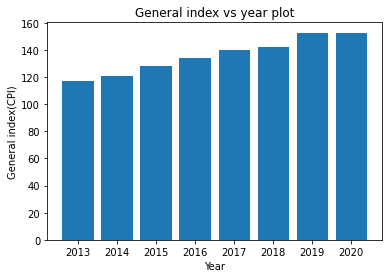

In [ ]:
plt.bar(df_without_housing['Year'],df_without_housing['General index'])
plt.xlabel('Year')
plt.ylabel('General index(CPI)')
plt.title('General index vs year plot')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


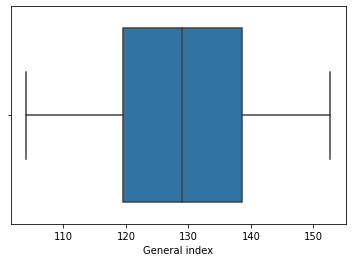

In [ ]:
sns.boxplot(df_without_housing['General index'])

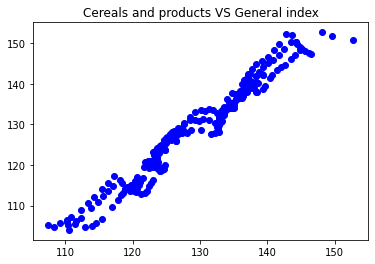

<Figure size 4824x1080 with 0 Axes>

In [ ]:
x_axis1=df_without_housing['Cereals and products']
y_axis1=df_without_housing['General index']
#plt.figure(figsize=(18, 15))
plt.scatter(x_axis1,y_axis1,c='blue')
plt.title('Cereals and products VS General index')
plt.figure(figsize=(67, 15))
plt.show()

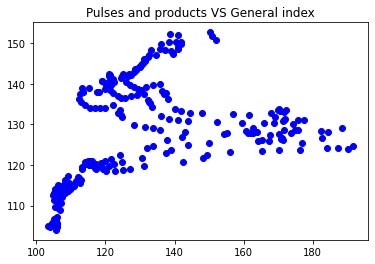

In [ ]:
x_axis1=df_without_housing['Pulses and products']
y_axis1=df_without_housing['General index']
#plt.figure(figsize=(18, 15))
plt.scatter(x_axis1,y_axis1,c='blue')
plt.title('Pulses and products VS General index')
plt.show()

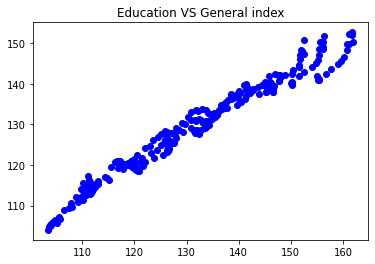

In [ ]:
x_axis1=df_without_housing['Education']
y_axis1=df_without_housing['General index']
#plt.figure(figsize=(18, 15))
plt.scatter(x_axis1,y_axis1,c='blue')
plt.title('Education VS General index')
plt.show()

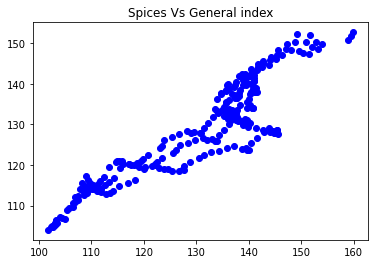

In [ ]:
x_axis1=df_without_housing['Spices']
y_axis1=df_without_housing['General index']
#plt.figure(figsize=(18, 15))
plt.scatter(x_axis1,y_axis1,c='blue')
plt.title('Spices Vs General index')
plt.show()

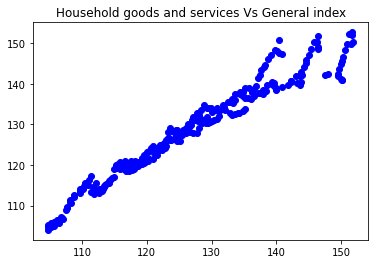

In [ ]:
x_axis1=df_without_housing['Household goods and services']
y_axis1=df_without_housing['General index']
plt.scatter(x_axis1,y_axis1,c='blue')
plt.title('Household goods and services Vs General index')
plt.show()

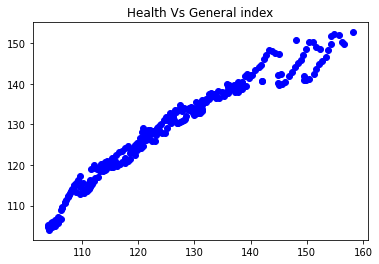

In [ ]:
x_axis1=df_without_housing['Health']
y_axis1=df_without_housing['General index']
plt.scatter(x_axis1,y_axis1,c='blue')
plt.title('Health Vs General index')
plt.show()

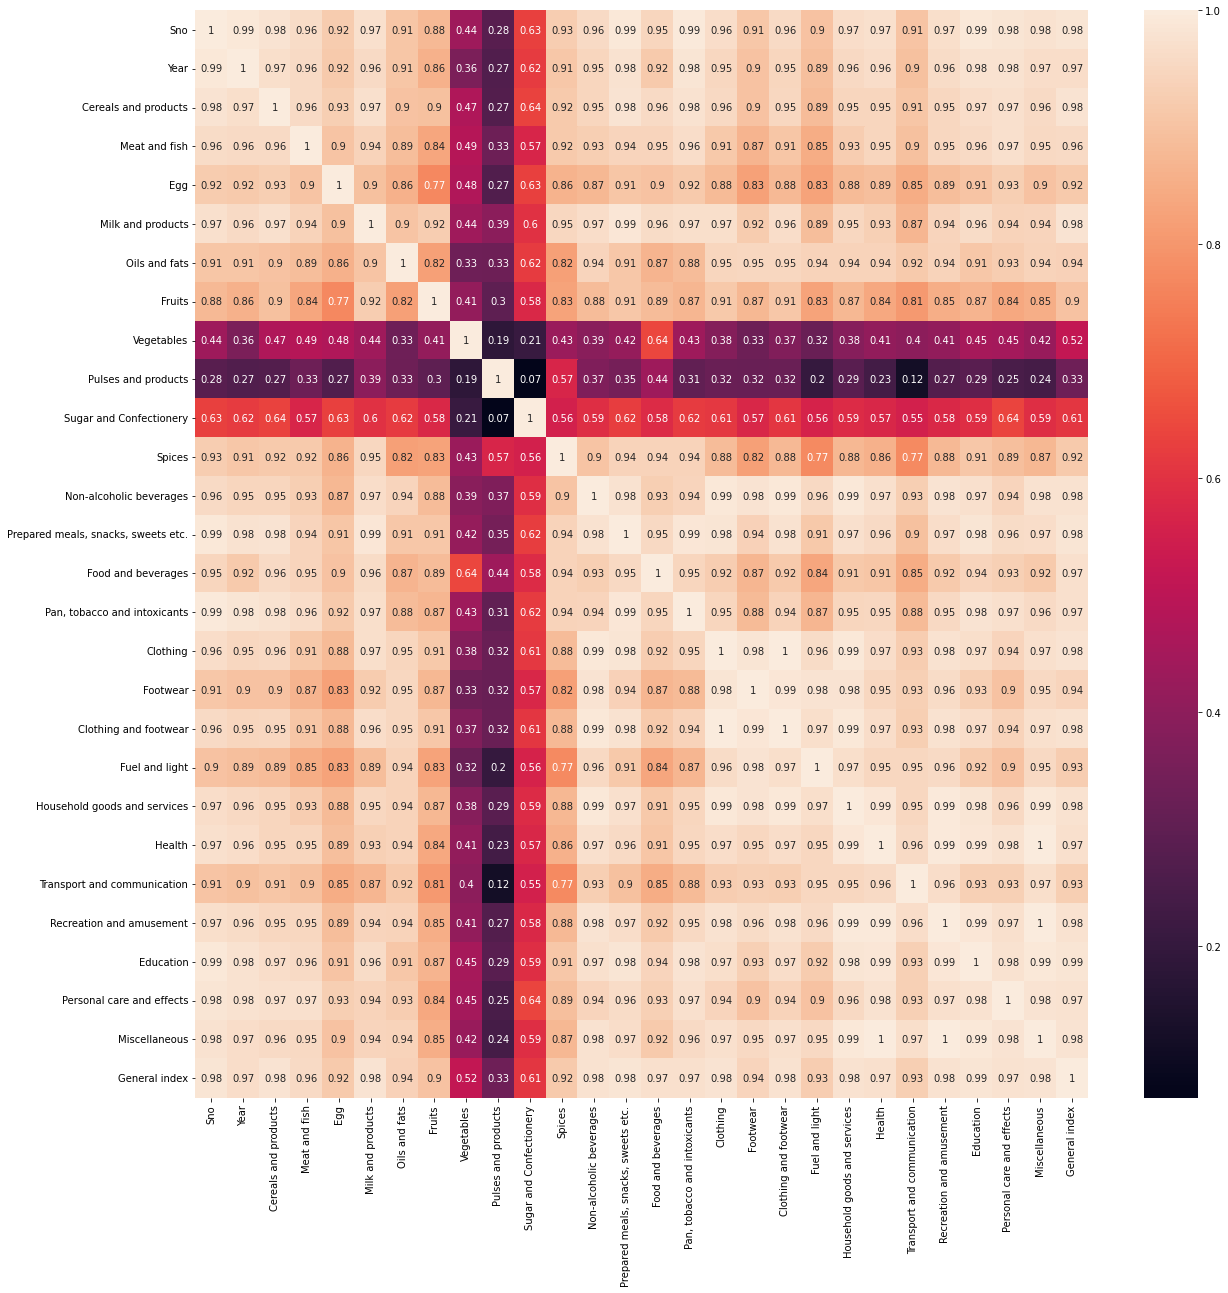

In [ ]:
plt.figure(figsize=(20,20))
c=df_without_housing.corr()
sns.heatmap(c,annot=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6fe2641550>,
      dtype=object)

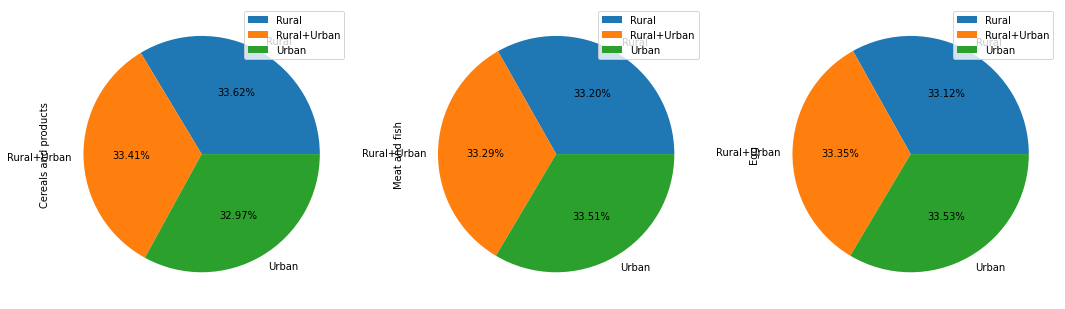

In [ ]:
df_g2=df_without_housing.groupby(['Sector'])['Cereals and products','Meat and fish',	'Egg'].median()
df_g2.plot.pie(subplots=True,autopct='%1.2f%%',figsize=(18,15))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6fe2298b90>,
      dtype=object)

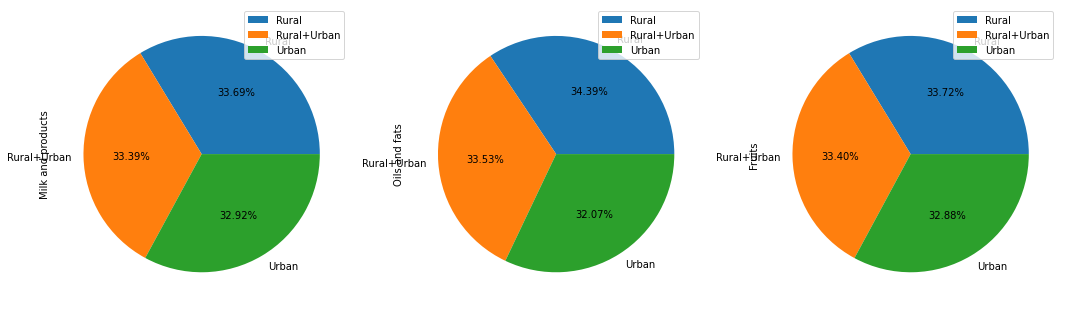

In [ ]:
df_g3=df_without_housing.groupby(['Sector'])['Milk and products'	,'Oils and fats',	'Fruits'].median()
df_g3.plot.pie(subplots=True,autopct='%1.2f%%',figsize=(18,15))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6fe21be410>,
      dtype=object)

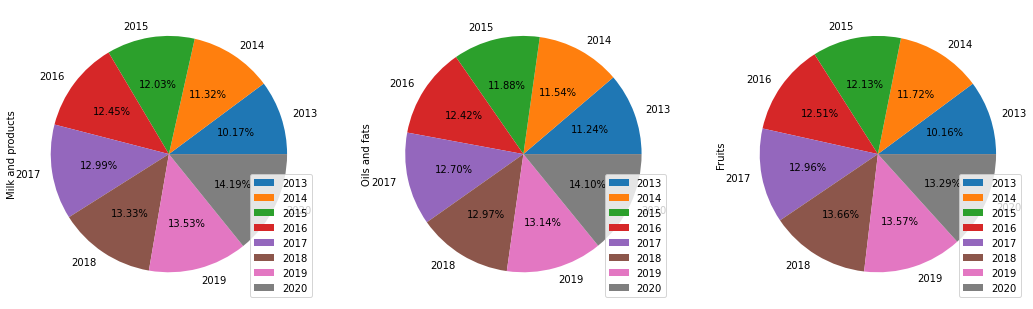

In [ ]:
df_g4=df_without_housing.groupby(['Year'])['Milk and products'	,'Oils and fats',	'Fruits'].median()
df_g4.plot.pie(subplots=True,autopct='%1.2f%%',figsize=(18,15))

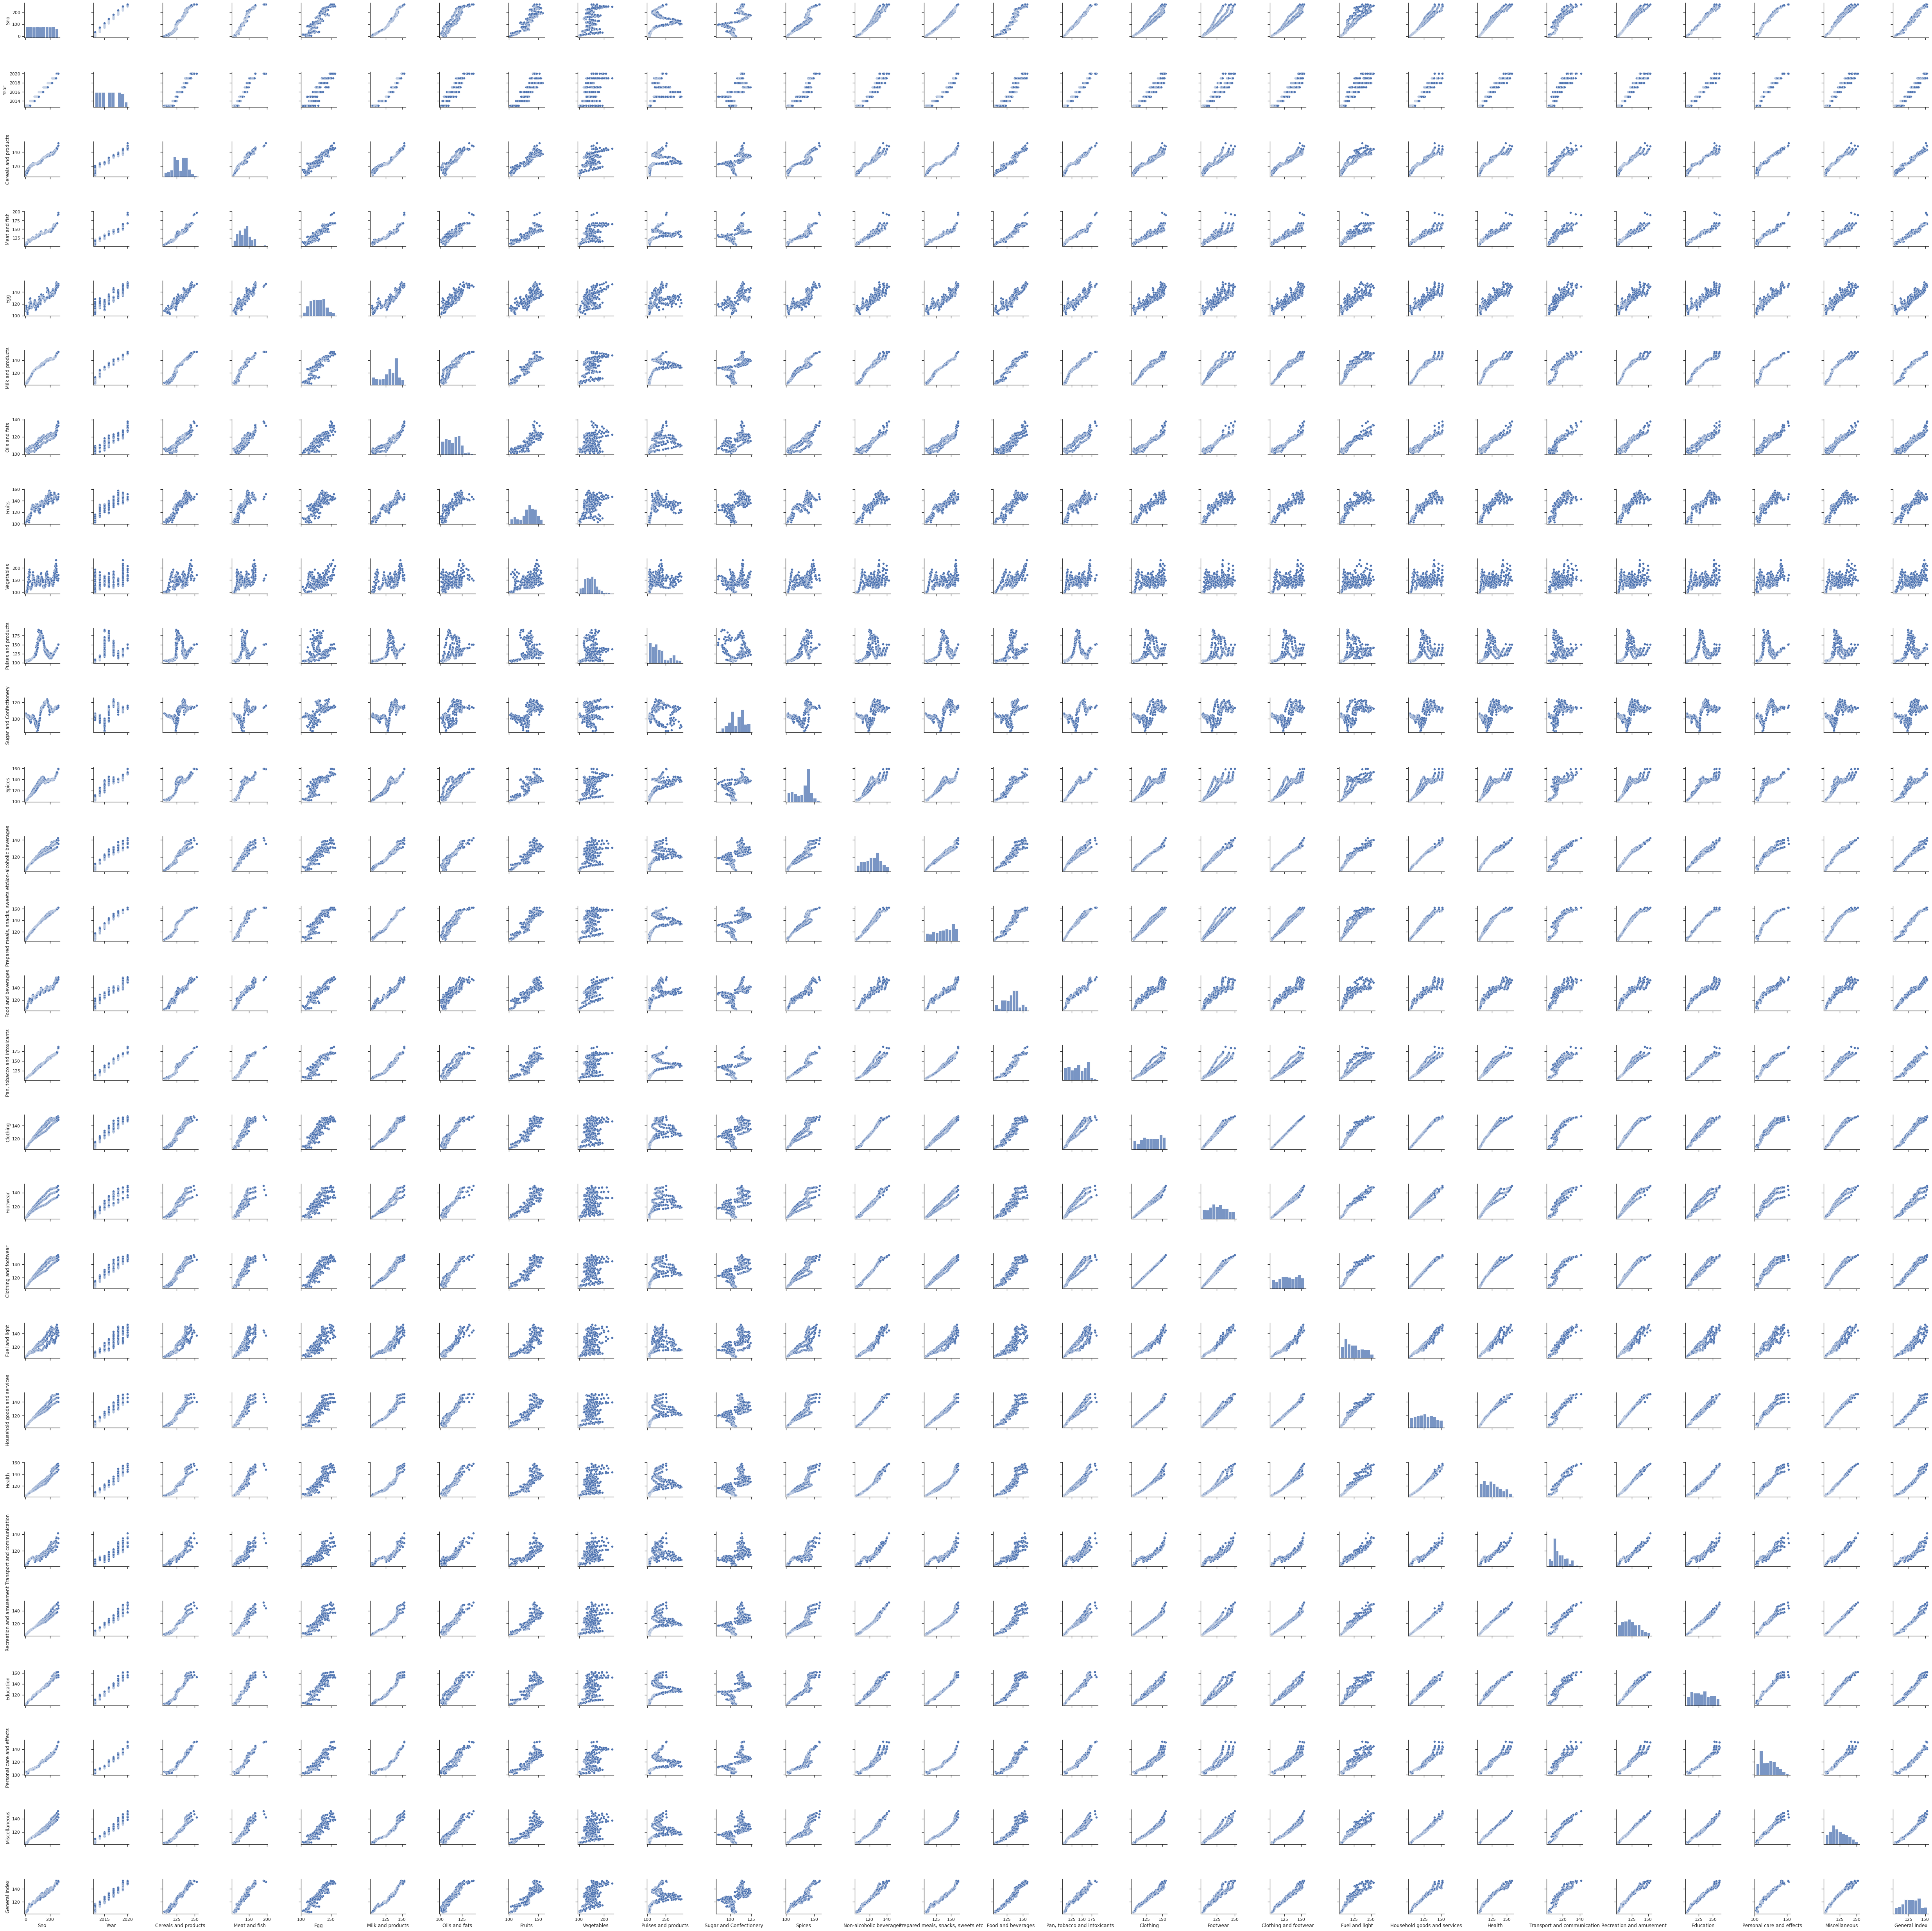

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_without_housing)
plt.show()

In [ ]:
df_withoutHousing=df.drop(['Housing'],axis=1)
df_withoutHousing
df_without_housing_hsng=df_withoutHousing.dropna()
df_without_housing1=df_without_housing.drop(['Sno','Year','Month','Sector'],axis=1)

In [ ]:
df_with_index=df_without_housing.set_index("Sector")
df_with_index.head(4)

Sno  Year Month  Cereals and products  Meat and fish    Egg  \
Sector                                                                     
Rural          1  2013   Jan                 107.5          106.3  108.1   
Urban          2  2013   Jan                 110.5          109.1  113.0   
Rural+Urban    3  2013   Jan                 108.4          107.3  110.0   
Rural          4  2013   Feb                 109.2          108.7  110.2   

             Milk and products  Oils and fats  Fruits  Vegetables  ...  \
Sector                                                             ...   
Rural                    104.9          106.1   103.9       101.9  ...   
Urban                    103.6          103.4   102.3       102.9  ...   
Rural+Urban              104.4          105.1   103.2       102.2  ...   
Rural                    105.4          106.7   104.0       102.4  ...   

             Clothing and footwear  Fuel and light  \
Sector                                               
Rural                        106.4           105.5   
Urban                        105.8           105.4   
Rural+Urban                  106.2           105.5   
Rural                        107.0           106.2   

             Household goods and services  Health  \
Sector                                              
Rural                               104.8   104.0   
Urban                               104.8   104.1   
Rural+Urban                         104.8   104.0   
Rural                               105.2   104.4   

             Transport and communication  Recreation and amusement  Education  \
Sector                                                                          
Rural                              103.3                     103.4      103.8   
Urban                              103.2                     102.9      103.5   
Rural+Urban                        103.2                     103.1      103.6   
Rural                              103.9                     104.0      104.1   

             Personal care and effects  Miscellaneous  General index  
Sector                                                                
Rural                            104.7          104.0          105.1  
Urban                            104.3          103.7          104.0  
Rural+Urban                      104.5          103.9          104.6  
Rural                            104.6          104.4          105.8  

[4 rows x 29 columns]

In [ ]:
data=df_with_index.drop("Rural+Urban")
data.head(4)

Sno  Year Month  Cereals and products  Meat and fish    Egg  \
Sector                                                                
Rural     1  2013   Jan                 107.5          106.3  108.1   
Urban     2  2013   Jan                 110.5          109.1  113.0   
Rural     4  2013   Feb                 109.2          108.7  110.2   
Urban     5  2013   Mar                 112.9          112.9  116.9   

        Milk and products  Oils and fats  Fruits  Vegetables  ...  \
Sector                                                        ...   
Rural               104.9          106.1   103.9       101.9  ...   
Urban               103.6          103.4   102.3       102.9  ...   
Rural               105.4          106.7   104.0       102.4  ...   
Urban               104.0          103.5   103.1       104.9  ...   

        Clothing and footwear  Fuel and light  Household goods and services  \
Sector                                                                        
Rural                   106.4           105.5                         104.8   
Urban                   105.8           105.4                         104.8   
Rural                   107.0           106.2                         105.2   
Urban                   106.4           105.7                         105.2   

        Health  Transport and communication  Recreation and amusement  \
Sector                                                                  
Rural    104.0                        103.3                     103.4   
Urban    104.1                        103.2                     102.9   
Rural    104.4                        103.9                     104.0   
Urban    104.7                        104.4                     103.3   

        Education  Personal care and effects  Miscellaneous  General index  
Sector                                                                      
Rural       103.8                      104.7          104.0          105.1  
Urban       103.5                      104.3          103.7          104.0  
Rural       104.1                      104.6          104.4          105.8  
Urban       103.7                      104.3          104.3          104.7  

[4 rows x 29 columns]

In [ ]:
data.columns

Index(['Sno', 'Year', 'Month', 'Cereals and products', 'Meat and fish', 'Egg',
       'Milk and products', 'Oils and fats', 'Fruits', 'Vegetables',
       'Pulses and products', 'Sugar and Confectionery', 'Spices',
       'Non-alcoholic beverages', 'Prepared meals, snacks, sweets etc.',
       'Food and beverages', 'Pan, tobacco and intoxicants', 'Clothing',
       'Footwear', 'Clothing and footwear', 'Fuel and light',
       'Household goods and services', 'Health', 'Transport and communication',
       'Recreation and amusement', 'Education', 'Personal care and effects',
       'Miscellaneous', 'General index'],
      dtype='object')

In [ ]:
data1=data.drop(labels=['Year',"Egg","Sno","Month","Pan, tobacco and intoxicants"
,"Non-alcoholic beverages","Personal care and effects","Fuel and light","Clothing and footwear"
,"Recreation and amusement",'Prepared meals, snacks, sweets etc.'],axis=1)

In [ ]:
data1.reset_index().head(4)

Sector  Cereals and products  Meat and fish  Milk and products  \
0  Rural                 107.5          106.3              104.9   
1  Urban                 110.5          109.1              103.6   
2  Rural                 109.2          108.7              105.4   
3  Urban                 112.9          112.9              104.0   

   Oils and fats  Fruits  Vegetables  Pulses and products  \
0          106.1   103.9       101.9                106.1   
1          103.4   102.3       102.9                105.8   
2          106.7   104.0       102.4                105.9   
3          103.5   103.1       104.9                104.1   

   Sugar and Confectionery  Spices  Food and beverages  Clothing  Footwear  \
0                    106.8   103.1               105.5     106.5     105.8   
1                    105.1   101.8               105.9     105.9     105.0   
2                    105.7   103.1               106.3     107.1     106.3   
3                    103.8   102.3               107.2     106.6     105.5   

   Household goods and services  Health  Transport and communication  \
0                         104.8   104.0                        103.3   
1                         104.8   104.1                        103.2   
2                         105.2   104.4                        103.9   
3                         105.2   104.7                        104.4   

   Education  Miscellaneous  General index  
0      103.8          104.0          105.1  
1      103.5          103.7          104.0  
2      104.1          104.4          105.8  
3      103.7          104.3          104.7

In [ ]:
y=data1[['Cereals and products', 'Meat and fish', 'Milk and products',
       'Oils and fats', 'Vegetables', 'Pulses and products',
       'Sugar and Confectionery', 'Spices',
        'Food and beverages', 'Clothing',
       'Footwear', 'Household goods and services', 'Health',
       'Transport and communication', 'Education', 'Miscellaneous',
       'General index','Fruits']]

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = data1.columns

In [ ]:
vif_data["VIF"] = [variance_inflation_factor(y.values, i)
                          for i in range(len(y.columns))]
print(vif_data)

                         feature           VIF
0           Cereals and products  8.165494e+04
1                  Meat and fish  9.842116e+03
2              Milk and products  3.712944e+04
3                  Oils and fats  1.316518e+04
4                         Fruits  1.815900e+04
5                     Vegetables  3.066316e+03
6            Pulses and products  1.093118e+03
7        Sugar and Confectionery  1.870065e+04
8                         Spices  1.328196e+06
9             Food and beverages  6.840460e+04
10                      Clothing  4.011522e+04
11                      Footwear  1.158355e+05
12  Household goods and services  1.018614e+05
13                        Health  6.878085e+04
14   Transport and communication  4.143566e+04
15                     Education  5.165573e+05
16                 Miscellaneous  3.127042e+05
17                 General index  7.192958e+03


In [ ]:
regressors=data1.drop(labels=['General index','Meat and fish','Cereals and products'],axis=1)
response=data1['General index']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(regressors, response, test_size = 0.2, random_state = 42)

In [ ]:
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_predict=LR.predict(x_test)

In [ ]:
score=r2_score(y_test,y_predict)
print('r2 socre is ',score)
print('mean_sqrd_error is ',mean_squared_error(y_test,y_predict))
print('root_mean_squared error of is ',np.sqrt(mean_squared_error(y_test,y_predict)))

r2 socre is  0.9986866916953459
mean_sqrd_error is  0.1837214754470563
root_mean_squared error of is  0.42862743198150105
